In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from scipy.stats import skew
from scipy.special import boxcox1p 

/tmp/ipykernel_38281/1941413742.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [4]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [5]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [6]:
all_data.shape

(2919, 79)

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [8]:
all_data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,1153,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,879,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [9]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
col = ['MiscFeature', 'Fence', 'PoolQC', 'Alley', 'GarageArea']

all_data.drop(columns=col, axis=1, inplace=True)

In [11]:
train.drop(columns=col, axis=1, inplace=True)
test.drop(columns=col, axis=1, inplace=True)

In [12]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,7,2006,WD,Normal


In [13]:
all_df = all_data.copy()

In [14]:
# import matplotlib.pyplot as plt

# def plot_ridge(alphas, cv_ridge, title, color):
#     model_ridge = Ridge()
#     cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]
#     cv_ridge = pd.Series(cv_ridge, index=alphas)
#     cv_ridge.plot(title=title, color=color, label=title)
#     plt.xlabel("alpha")
#     plt.ylabel("rmse")

# alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

# plot_ridge(alphas, cv_ridge1, "Val (Model 1)", color='yellow')
# plot_ridge(alphas, cv_ridge, "Val (Model 2)", color='red')

# plt.legend()
# plt.show()


In [15]:
# model_ridge1 = Ridge()

# alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
# cv_ridge1 = [rmse_cv(Ridge(alpha = alpha)).mean() 
#             for alpha in alphas]

# cv_ridge1 = pd.Series(cv_ridge1, index = alphas)
# cv_ridge1.plot(title = "Val")
# plt.xlabel("alpha")
# plt.ylabel("rmse")

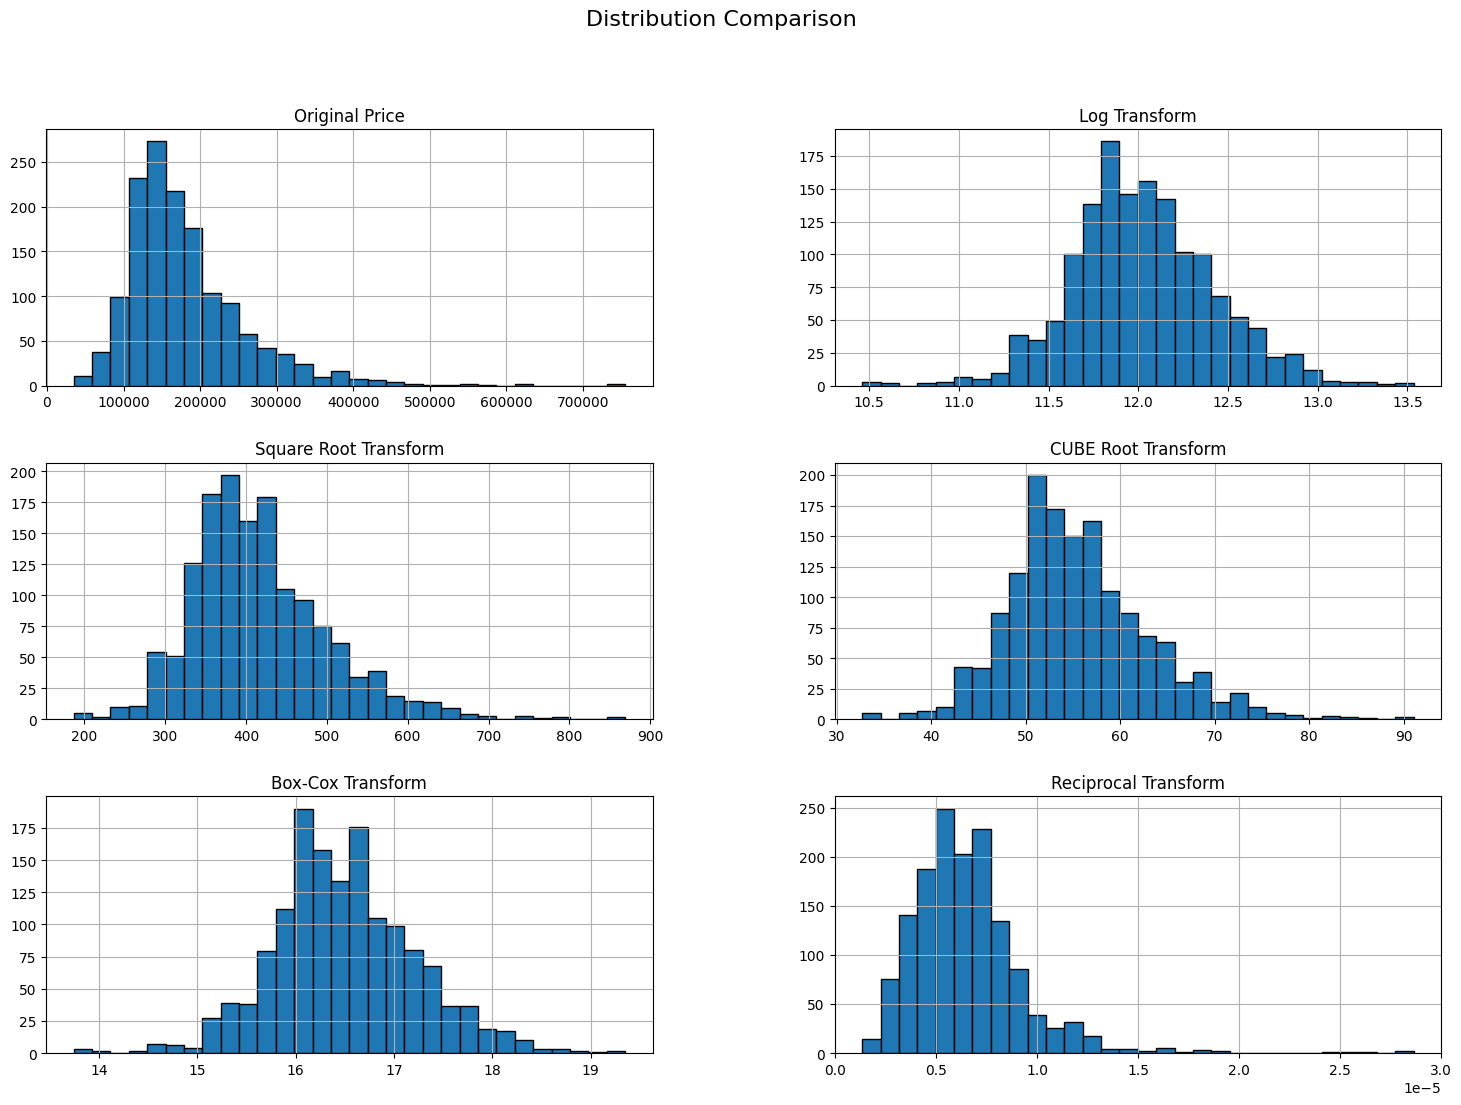

In [16]:
plt.rcParams['figure.figsize'] = (18.0, 12.0)

# Создание DataFrame с ценами
prices = pd.DataFrame({
    "Original Price": train["SalePrice"],
    "Log Transform": np.log1p(train["SalePrice"]),
    "Square Root Transform": np.sqrt(train["SalePrice"]),
    "CUBE Root Transform": np.cbrt(train["SalePrice"]),
    "Box-Cox Transform": boxcox1p(train["SalePrice"], 0.05),  # Примерное значение лямбда (lambda)
    # "Yeo-Johnson Transform": yeojohnson(df["SalePrice"])[0],
    "Reciprocal Transform": 1 / (train["SalePrice"] + 1)
})

# Построение гистограмм
prices.hist(bins=30, edgecolor='black')
plt.suptitle('Distribution Comparison', fontsize=16)
plt.show()

# BOX

In [17]:
# train["SalePrice"] = boxcox1p(train["SalePrice"], 0.05)

# # get numeric features
# numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# # compute skewness for each numeric feature
# skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))

# # filter features with skewness > 0.75
# skewed_feats = skewed_feats[skewed_feats > 0.75].index

# # apply Box-Cox transformation to reduce skewness
# for feat in skewed_feats:
#     all_data[feat] = boxcox1p(all_data[feat], 0.05)

In [18]:
# all_data = pd.get_dummies(all_data)

In [19]:
# all_data = all_data.fillna(all_data.mean())

In [20]:
# X_train = all_data[:train.shape[0]]
# X_test = all_data[test.shape[0]:]
# y = train.SalePrice



In [21]:
# def rmse_cv(model):
#     rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
#     return(rmse)



In [22]:
# model_ridge = Ridge()
# alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
# cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
#             for alpha in alphas]

In [23]:
# cv_ridge = pd.Series(cv_ridge, index = alphas)
# cv_ridge.min() #all_data mean
# # 0.22912716984566264

In [24]:
# model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
# rmse_cv(model_lasso).mean()
# # 0.22173753195092663

In [25]:
# train["SalePrice"] = boxcox1p(train["SalePrice"], 0.05)

# # get numeric features
# numeric_feats = all_df.dtypes[all_df.dtypes != "object"].index

# # compute skewness for each numeric feature
# skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))

# # filter features with skewness > 0.75
# skewed_feats = skewed_feats[skewed_feats > 0.75].index

# # apply Box-Cox transformation to reduce skewness
# for feat in skewed_feats:
#     all_df[feat] = boxcox1p(all_df[feat], 0.05)

In [26]:
# all_df = pd.get_dummies(all_df)
# all_df = all_df.fillna(all_df.median())

In [27]:
# X_train1 = all_df[:train.shape[0]]
# X_test1 = all_df[test.shape[0]:]
# y1 = train.SalePrice

In [28]:
# def rmse_cv1(model):
#     rmse= np.sqrt(-cross_val_score(model, X_train1, y1, scoring="neg_mean_squared_error", cv = 5))
#     return(rmse)

In [29]:
# model_ridge = Ridge()
# alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
# cv_ridge = [rmse_cv1(Ridge(alpha = alpha)).mean() 
#             for alpha in alphas]

# cv_ridge = pd.Series(cv_ridge, index = alphas)
# cv_ridge.min() #all_df median
# # 0.015220658229221806

In [30]:
# model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train1, y1)
# rmse_cv1(model_lasso).mean()
# # 0.016599654974983218

# log

In [31]:
train["SalePrice"] = np.log1p(train["SalePrice"])

# get numeric features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# compute skewness for each numeric feature
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))

# filter features with skewness > 0.75
skewed_feats = skewed_feats[skewed_feats > 0.75].index

# apply Box-Cox transformation to reduce skewness
for feat in skewed_feats:
    all_data[feat] = np.log1p(all_data[feat])

In [32]:
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

In [33]:
X_train = all_data[:train.shape[0]]
X_test = all_data[test.shape[0]:]
y = train.SalePrice



In [34]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)



In [35]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.min() #all_data mean
# 0.22912716984566264

0.12608230800969414

In [36]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_lasso).mean()
# 0.22173753195092663

0.12151404870422125

## median

In [37]:
train["SalePrice"] = np.log1p(train["SalePrice"])

# get numeric features
numeric_feats = all_df.dtypes[all_df.dtypes != "object"].index

# compute skewness for each numeric feature
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))

# filter features with skewness > 0.75
skewed_feats = skewed_feats[skewed_feats > 0.75].index

# apply Box-Cox transformation to reduce skewness
for feat in skewed_feats:
    all_df[feat] = np.log1p(all_df[feat])

In [38]:
all_df = pd.get_dummies(all_df)
all_df = all_df.fillna(all_df.median())

In [67]:
X_train1 = all_df[:train.shape[0]]
X_test1 = all_df[test.shape[0]+1:]
y1 = train.SalePrice

In [70]:
def rmse_cv1(model):
    rmse= np.sqrt(-cross_val_score(model, X_train1, y1, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [71]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv1(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.min() #all_df median
# 0.015220658229221806

0.009760009082974504

In [72]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train1, y1)
rmse_cv1(model_lasso).mean()
# 0.016599654974983218

0.011091066054224982

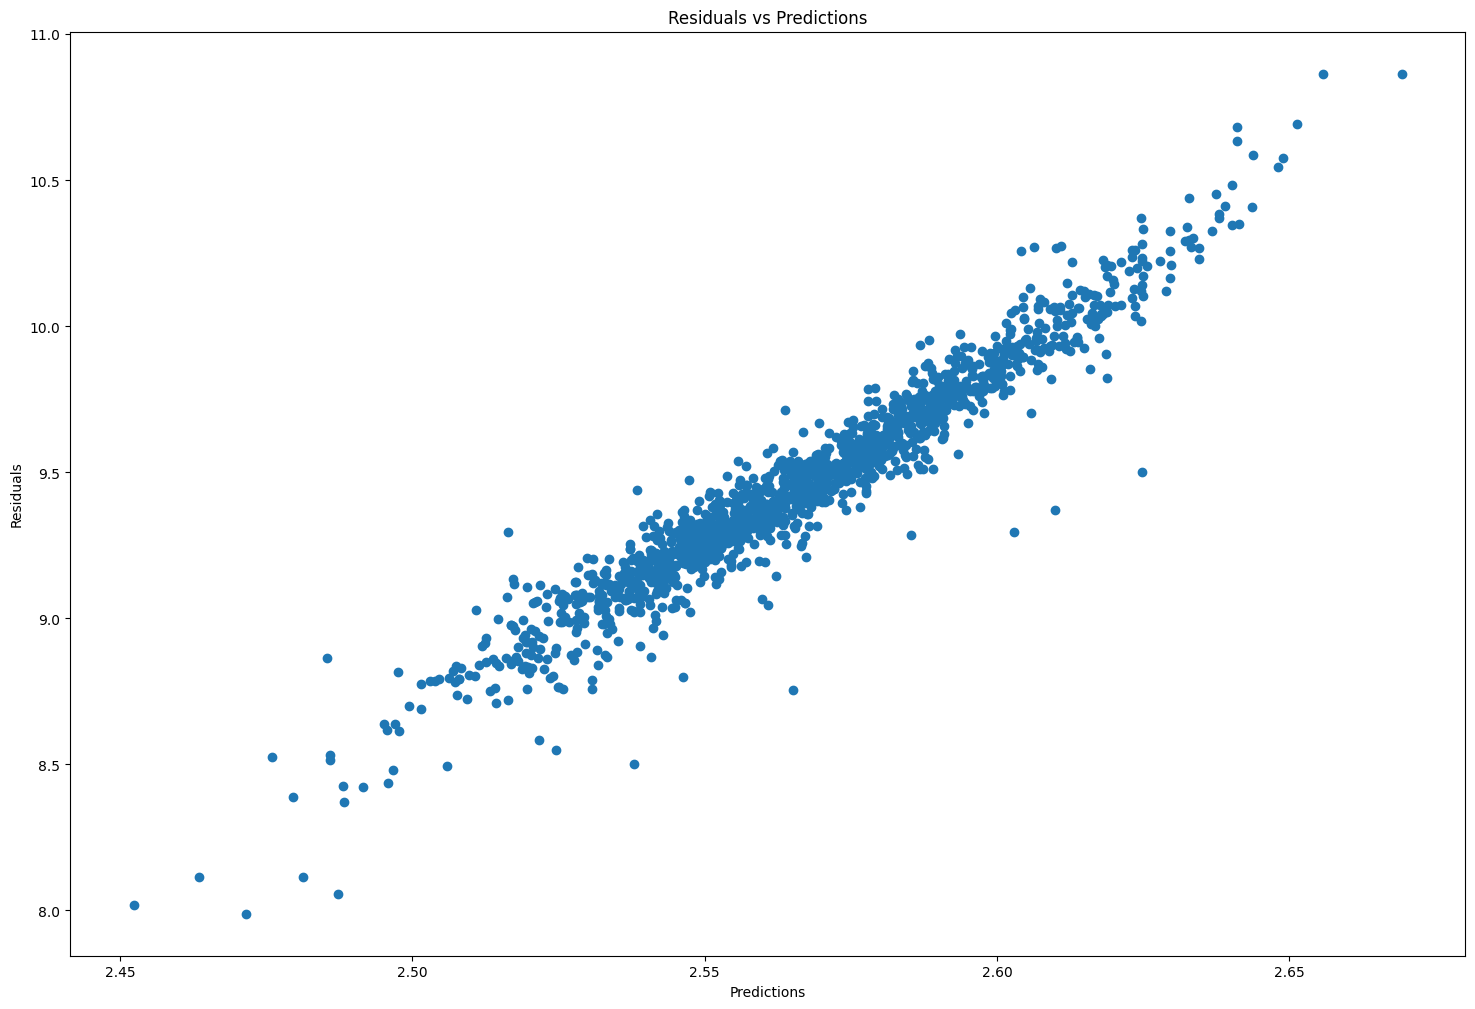

In [73]:
model_ridge = Ridge()

# Fit the Ridge model
model_ridge.fit(X_train1, y1)

# Make predictions
predictions = model_ridge.predict(X_train1)

# Create a DataFrame with predictions and true values
preds = pd.DataFrame({"preds": predictions, "true": y})

# Calculate residuals
preds["residuals"] = preds["true"] - preds["preds"]

# Plot residuals against predictions
plt.scatter(preds["preds"], preds["residuals"])
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()

In [74]:
r_preds = np.expm1(model_ridge.predict(X_test1))


In [75]:
print(len(test))
print(len(X_test1))


1459
1459


In [76]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":r_preds})
solution.to_csv("NewRidgeMedian.csv", index = False)

In [77]:
model_e = ElasticNet()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_e = [rmse_cv(ElasticNet(alpha = alpha)).mean() 
            for alpha in alphas]

In [78]:
cv_e = pd.Series(cv_e, index = alphas)
cv_e.min()

0.16802146103168716

In [79]:
model_e = ElasticNet()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_e = [rmse_cv1(ElasticNet(alpha = alpha)).mean() 
            for alpha in alphas]

In [80]:
cv_e = pd.Series(cv_e, index = alphas)
cv_e.min()

0.023447438336845063

In [81]:
import warnings
warnings.filterwarnings('ignore')
model_l = LassoLarsCV()
alphas = [ 500, 800, 1000, 1200, 1500]
cv_l = [rmse_cv(LassoLarsCV(max_n_alphas = alpha)).mean() 
            for alpha in alphas]
cv_l = pd.Series(cv_l, index = alphas)
cv_l.min()

0.12224671331773593

In [82]:
import warnings
warnings.filterwarnings('ignore')
model_l = LassoLarsCV()
alphas = [ 500, 800, 1000, 1200, 1500]
cv_l = [rmse_cv1(LassoLarsCV(max_n_alphas = alpha)).mean() 
            for alpha in alphas]
cv_l = pd.Series(cv_l, index = alphas)
cv_l.min()

0.009498875203663397

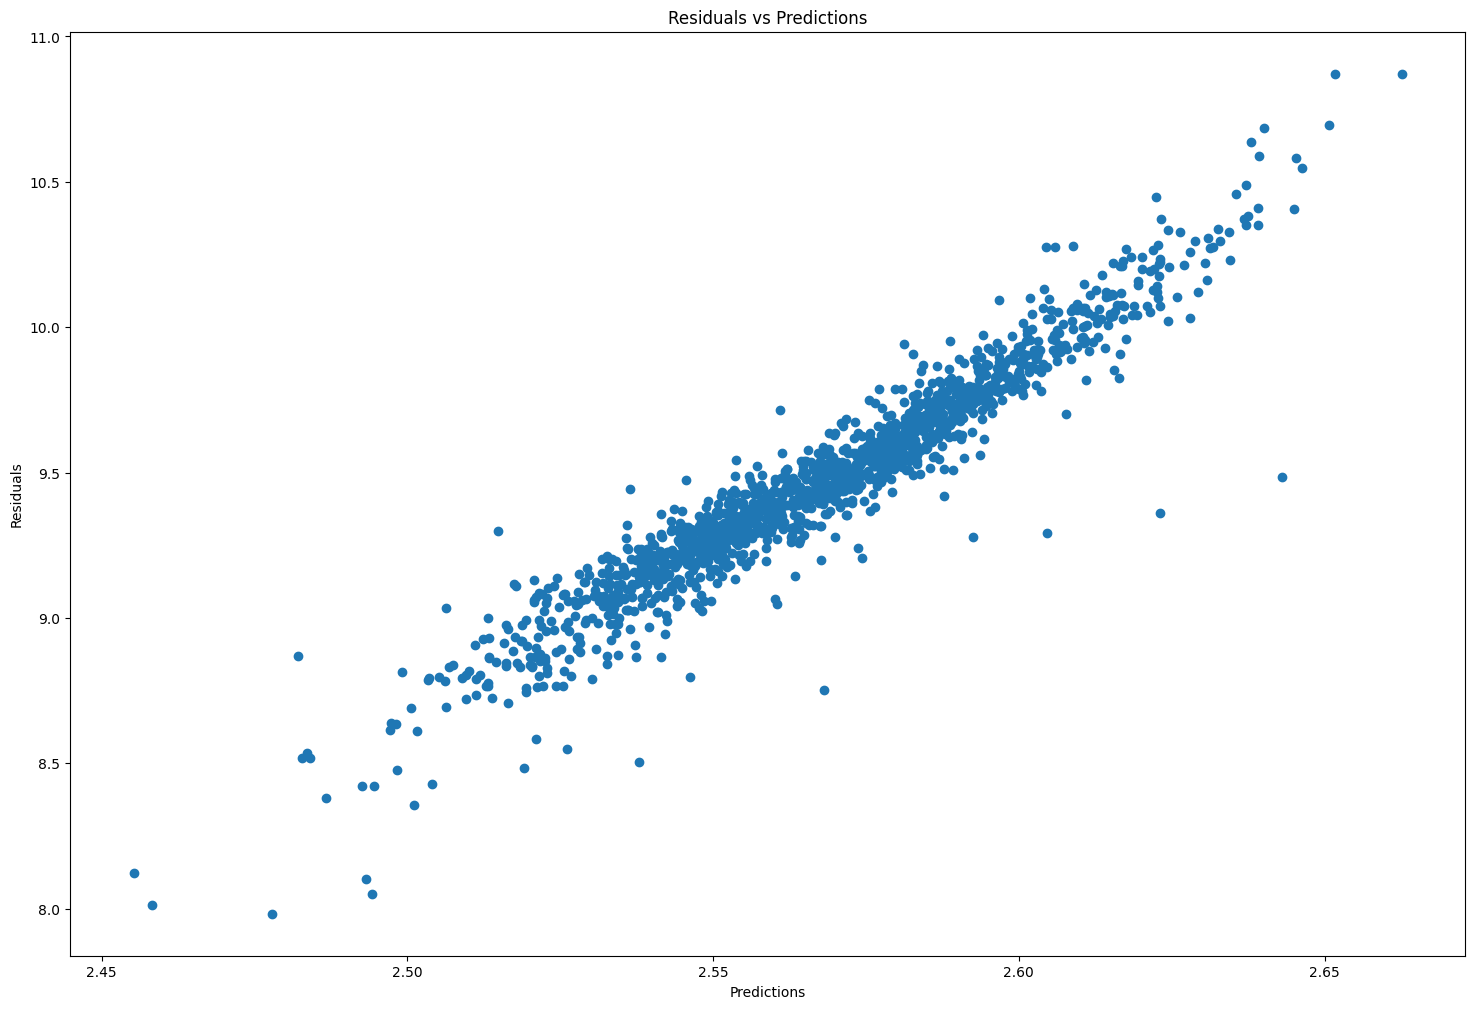

In [83]:
model_ridge = LassoLarsCV()

# Fit the Ridge model
model_ridge.fit(X_train1, y1)

# Make predictions
predictions = model_ridge.predict(X_train1)

# Create a DataFrame with predictions and true values
preds = pd.DataFrame({"preds": predictions, "true": y})

# Calculate residuals
preds["residuals"] = preds["true"] - preds["preds"]

# Plot residuals against predictions
plt.scatter(preds["preds"], preds["residuals"])
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()

In [84]:
r_preds = np.expm1(model_ridge.predict(X_test1))


In [85]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":r_preds})
solution.to_csv("NewLAssoLarsCVMedian1.csv", index = False)

In [86]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV

# Предварительная обработка данных
def preprocess_data(df):
    numeric_feats = df.select_dtypes(include=[np.number]).columns
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x))
    skewed_feats = skewed_feats[abs(skewed_feats) > 0.75].index

    df[skewed_feats] = np.log1p(df[skewed_feats])
    df = pd.get_dummies(df)
    return df

# Подготовка данных
all_df_processed = preprocess_data(all_df)
all_df_processed = all_df_processed.fillna(all_df_processed.median())

# Определение признаков и целевой переменной
X_train = all_df_processed[:train.shape[0]]
y_train = np.log1p(train["SalePrice"])

# Определение пайплайна
numeric_transformer = make_pipeline(SimpleImputer(strategy='median'), PowerTransformer())
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, all_df_processed.columns)
    ])

pipeline = make_pipeline(preprocessor, RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]))

# Кросс-валидация и вычисление RMSE
rmse = np.sqrt(-cross_val_score(pipeline, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
print("Минимальное RMSE:", rmse.min())


Минимальное RMSE: 0.0023979328585696466


In [89]:

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    all_df_processed[:train.shape[0]], np.log1p(train["SalePrice"]), test_size=0.2, random_state=42
)

# Обучение модели на обучающей выборке
pipeline.fit(X_train, y_train)

# Получение предсказаний для тестовой выборки
test_predictions = pipeline.predict(X_test1)

# Создание DataFrame с предсказаниями и сохранение в CSV
solution = pd.DataFrame({"id": test.Id, "SalePrice": test_predictions})
solution.to_csv("NewLAssoLarsCVMedian1.csv", index=False)


In [90]:
df.info()

NameError: name 'df' is not defined